In [21]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [22]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [23]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [24]:
source = 'race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [25]:
if not cap.isOpened():
    print("Error opening video stream or file")

In [26]:
ret, frame = cap.read()

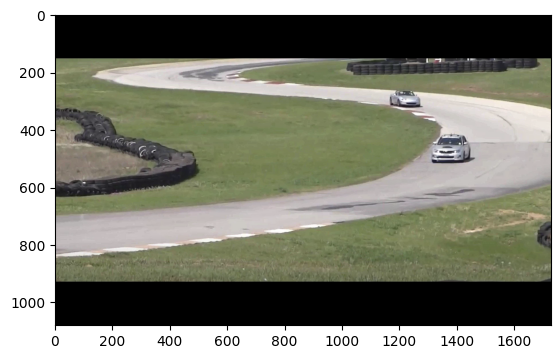

In [27]:
plt.imshow(frame[..., ::-1])

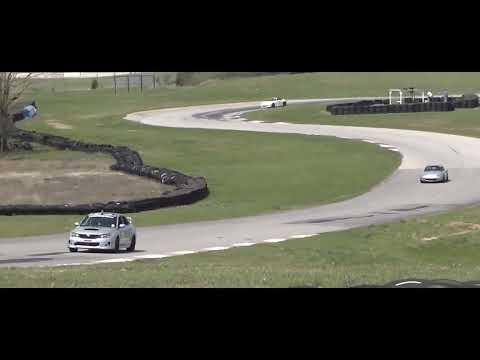

In [28]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

In [30]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [31]:
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [32]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

In [13]:
# Installing ffmpeg

#!apt-get -qq install ffmpeg

zsh:1: command not found: apt-get


In [33]:
# Change video encoding of mp4 file from XVID to h264
!ffmpeg -y -i "race_car_out.mp4" -c:v libx264 "race_car_out_x264.mp4"  -hide_banner -loglevel error

In [34]:
mp4 = open("race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")